# MSDS 422 Assignment 4 Part 1

In [37]:
import os
import time
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from keras.models import load_model, save_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
train = pd.read_csv("Downloads\digit_train.csv")
test = pd.read_csv("Downloads\digit_test.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Set random seed and subset training data into pixels and labels
np.random.seed(42)

X = train.iloc[:,1:785]
Y = train.iloc[:,0]

In [40]:
#Train/test split
xtrain, xval, ytrain, yval = train_test_split(X, Y, test_size=0.3,random_state=42)

#Check Shape
xtrain.shape, xval.shape, ytrain.shape, yval.shape

((29400, 784), (12600, 784), (29400,), (12600,))

In [41]:
#Convert dataframe into numpy array
xtrain = xtrain.to_numpy()
ytrain = ytrain.to_numpy()

#Same for validation set
xval = xval.to_numpy()
yval = yval.to_numpy()

In [42]:
#Scale Pixel Values
xtrain = xtrain/255
xval = xval/255

In [43]:
xtrain.shape

(29400, 784)

In [44]:
#Encode Target Variable
ytrain = keras.utils.to_categorical(ytrain, num_classes=10)
yval = keras.utils.to_categorical(yval, num_classes=10)

## Part 1A: MLPs

### Model 1: Two layer MLP with Relu Activation Function

In [45]:
#Create Model
model1 = keras.Sequential([
    keras.layers.Dense(500, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [46]:
#Compile Model
model1.compile(optimizer='sgd',
               loss='categorical_crossentropy',
               metrics=["categorical_accuracy"])

In [47]:
#Early Stopping to mitigate overfitting
early_stopping = keras.callbacks.EarlyStopping(
    patience=4,
    min_delta=0.001,
    restore_best_weights=True,
)

In [48]:
#Train Model
start = time.time()
training1 = model1.fit(xtrain, ytrain,
                       validation_data=(xval,yval),
                       batch_size=100,
                       epochs=30,
                       callbacks=[early_stopping],
                       verbose=0)
stop = time.time()
model1_time = stop-start

In [49]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (100, 500)                392500    
                                                                 
 dense_19 (Dense)            (100, 200)                100200    
                                                                 
 dense_20 (Dense)            (100, 10)                 2010      
                                                                 
Total params: 494,710
Trainable params: 494,710
Non-trainable params: 0
_________________________________________________________________


In [50]:
#Evaluate the model
metrics1 = model1.evaluate(xval, yval, verbose=2)

394/394 - 1s - loss: 0.1677 - categorical_accuracy: 0.9522 - 699ms/epoch - 2ms/step


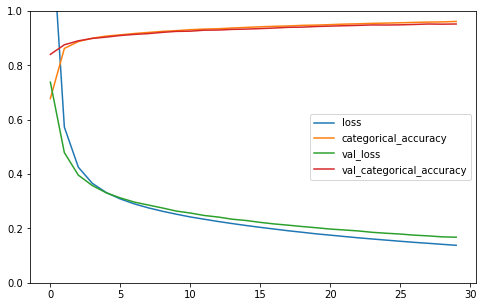

In [51]:
pd.DataFrame(training1.history).plot(figsize=(8,5))
plt.gca().set_ylim(0,1)
plt.show()

### Model 2: Two Layer MLP with Sigmoid Activation Function

In [52]:
#Create Model
model2 = keras.Sequential([
    keras.layers.Dense(500, activation="sigmoid"),
    keras.layers.Dense(200, activation="sigmoid"),
    keras.layers.Dense(10, activation="softmax")
])

In [53]:
model2.compile(optimizer='sgd',
               loss='categorical_crossentropy',
               metrics=["categorical_accuracy"])

In [54]:
#Train Model
start = time.time()
training2 = model2.fit(xtrain, ytrain,
                       validation_data=(xval,yval),
                       batch_size=100,
                       epochs=30,
                       callbacks=[early_stopping],
                       verbose=0)
stop = time.time()
model2_time = stop-start

In [55]:
#Evaluate the model
metrics2 = model2.evaluate(xval, yval, verbose=2)

394/394 - 1s - loss: 0.4817 - categorical_accuracy: 0.8722 - 738ms/epoch - 2ms/step


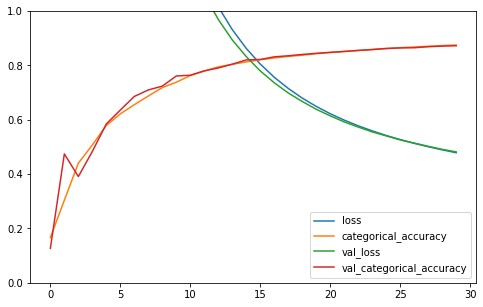

In [56]:
pd.DataFrame(training2.history).plot(figsize=(8,5))
plt.gca().set_ylim(0,1)
plt.show()

### Model 3: Three Layer MLP with Relu Activation Function

In [57]:
#Create Model
model3 = keras.Sequential([
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(500, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [58]:
model3.compile(optimizer='sgd',
               loss='categorical_crossentropy',
               metrics=["categorical_accuracy"])

In [59]:
#Train Model
start = time.time()
training3 = model3.fit(xtrain, ytrain,
                       validation_data=(xval,yval),
                       batch_size=100,
                       epochs=30,
                       callbacks=[early_stopping],
                       verbose=0)
stop = time.time()
model3_time = stop-start

In [60]:
#Evaluate the model
metrics3 = model3.evaluate(xval, yval, verbose=2)

394/394 - 1s - loss: 0.1303 - categorical_accuracy: 0.9625 - 1s/epoch - 3ms/step


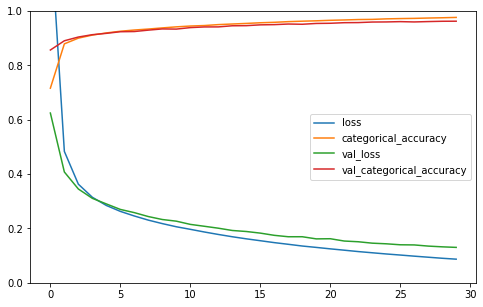

In [61]:
pd.DataFrame(training3.history).plot(figsize=(8,5))
plt.gca().set_ylim(0,1)
plt.show()

### Model 4: Three Layer MLP with Sigmoid Activation Function

In [62]:
#Create Model
model4 = keras.Sequential([
    keras.layers.Dense(1000, activation="sigmoid"),
    keras.layers.Dense(500, activation="sigmoid"),
    keras.layers.Dense(200, activation="sigmoid"),
    keras.layers.Dense(10, activation="softmax")
])

In [63]:
model4.compile(optimizer='sgd',
               loss='categorical_crossentropy',
               metrics=["categorical_accuracy"])

In [64]:
#Train Model
start = time.time()
training4 = model4.fit(xtrain, ytrain,
                       validation_data=(xval,yval),
                       batch_size=100,
                       epochs=30,
                       callbacks=[early_stopping],
                       verbose=0)
stop = time.time()
model4_time = stop-start

In [65]:
#Evaluate the model
metrics4 = model4.evaluate(xval, yval, verbose=2)

394/394 - 1s - loss: 0.9494 - categorical_accuracy: 0.7319 - 1s/epoch - 3ms/step


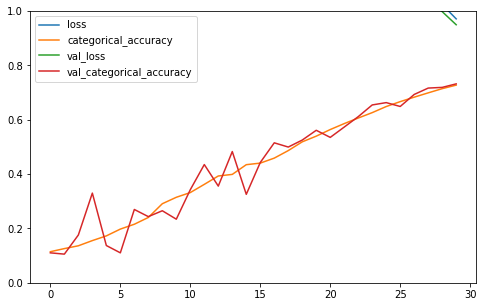

In [66]:
pd.DataFrame(training4.history).plot(figsize=(8,5))
plt.gca().set_ylim(0,1)
plt.show()

### Model Comparison

In [142]:
df = {"Model Number": ["1","2","3","4"],
      "Hidden Layers": ["2","2","3","3"],
      "Activation Function": ["Relu","Sigmoid","Relu","Sigmoid"],
      "Training Time": [model1_time, model2_time,model3_time,model4_time],
      "Validation Accuracy": [metrics1[1],metrics2[1],metrics3[1],metrics4[1]]
     }
df = pd.DataFrame(df)
display(df)

,Model Number,Hidden Layers,Activation Function,Training Time,Validation Accuracy
0,1,2,Relu,35.110563,0.952222
1,2,2,Sigmoid,35.081399,0.872222
2,3,3,Relu,80.570604,0.962460
3,4,3,Sigmoid,84.195890,0.731905


For Part 1A of this assignment, 4 MLP models were created for comparison purposes along two factors: the number of hidden layers and activation function used. For the models with two hidden layers, 500 and 200 neurons were used for each layer respectively. For the models with three hidden layers, the additional layer contains 1000 neurons. This will essentially test the hypothesis that adding more layers/more neurons will yield better results. 

We can see from the comparison table above that this is generally not the case. It is apparent that the Relu activation function provides much better results for both the two and three layered models over their sigmoid counterparts; we see accuracy scores over 0.95 for both Relu models, while neither sigmoid model achieved accuracy over 0.90. It is also important to note model training times. Adding just one more hidden layer to a model regardless of activation function more than doubled training time due to the added number of trainable parameters. We could also be seeing these results because of a vanishing gradient issue for the sigmoid function in lower hidden layers. This most likely explains why the  two layer sigmoid model had better accuracy than the three layer sigmoid model.

The accuracy scores for the Relu models were very close with each model having a slight benefit over the other: the two layer model is much faster/uses less computational resources while the three layer model achieves better performance in terms of accuracy and loss metrics by the end of 30 epochs. 

The 3 layer Relu model will be used to generate Kaggle predictions. 


### Kaggle Predictions

In [80]:
xfinal = test.to_numpy()
xfinal = xfinal/255
predictions = np.argmax(model3.predict(xfinal),axis=-1)

875/875 [==============================] - 3s 3ms/step


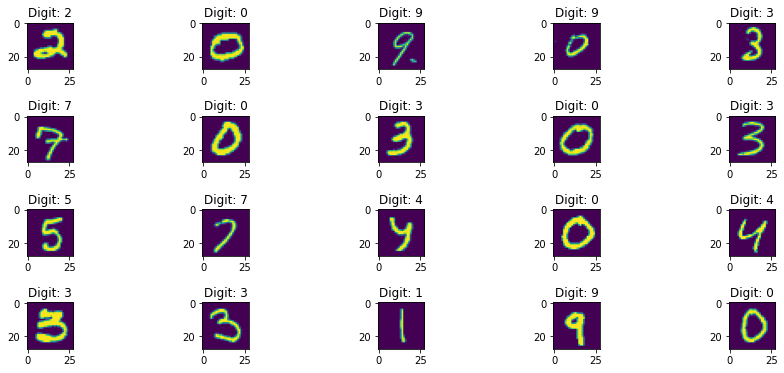

In [89]:
#Check Predictions
plt.figure(figsize=(15,6))
for i in range(20):  
    plt.subplot(4, 5, i+1)
    plt.imshow(xfinal[i].reshape((28,28)))
    plt.title(f"Digit: {predictions[i]}")
plt.subplots_adjust(wspace=0.3, hspace=1)
plt.show()

In [90]:
sample = pd.read_csv("Downloads\sample_submission.csv")
submission = pd.DataFrame()
submission['ImageId'] = sample['ImageId']
submission['label'] = predictions
submission.to_csv("Digit Predictions.csv", index=False)

## Part 1B: CNNs

In [113]:
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Dense, Dropout, Flatten 

In [114]:
#Train/test split
xtrain, xval, ytrain, yval = train_test_split(X, Y, test_size=0.3,random_state=42)

#Scale Pixel Values
xtrain = xtrain/255
xval = xval/255

#Reshape
xtrain = xtrain.values.reshape(-1,28,28,1)
xval = xval.values.reshape(-1,28,28,1)

#Encode Target Variable
ytrain = keras.utils.to_categorical(ytrain, num_classes=10)
yval = keras.utils.to_categorical(yval, num_classes=10)

## Model 1: 4 layer CNN with Relu Activation

In [123]:
#Create Model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

#Compile Model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["categorical_accuracy"])

In [145]:
#Fit the model and record training time
#start = time.time()
#training = model.fit(xtrain, ytrain, validation_data=(xval, yval), batch_size=100, epochs=20,  verbose=0)
#end = time.time()
#cnn1_time = end-start

In [127]:
#Evaluate the model
metrics_cnn = model.evaluate(xval, yval, verbose=2)

394/394 - 6s - loss: 0.0323 - categorical_accuracy: 0.9913 - 6s/epoch - 14ms/step


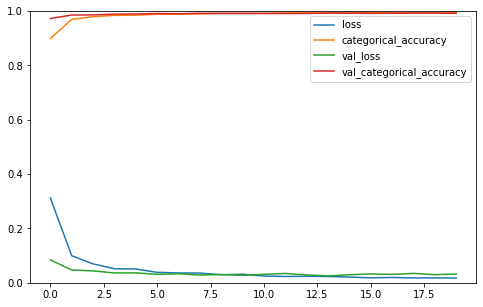

In [129]:
pd.DataFrame(training.history).plot(figsize=(8,5))
plt.gca().set_ylim(0,1)
plt.show()

## Model 2: 4 layer CNN with Sigmoid Activation

In [134]:
#Create Model
model_2 = Sequential()

model_2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='sigmoid', input_shape = (28,28,1)))
model_2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='sigmoid'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))


model_2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='sigmoid'))
model_2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='sigmoid'))
model_2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model_2.add(Dropout(0.25))


model_2.add(Flatten())
model_2.add(Dense(256, activation = "sigmoid"))
model_2.add(Dropout(0.5))
model_2.add(Dense(10, activation = "softmax"))

#Compile Model
model_2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["categorical_accuracy"])

In [135]:
#Fit the model and record training time
#start = time.time()
#training2 = model_2.fit(xtrain, ytrain, validation_data=(xval, yval), batch_size=100, epochs=20,  verbose=0)
#end = time.time()

In [139]:
#cnn2_time = end-start

In [136]:
#Evaluate the model
metrics2_cnn = model_2.evaluate(xval, yval, verbose=2)

394/394 - 10s - loss: 0.0449 - categorical_accuracy: 0.9854 - 10s/epoch - 24ms/step


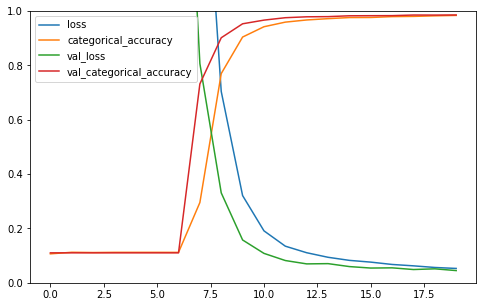

In [137]:
pd.DataFrame(training2.history).plot(figsize=(8,5))
plt.gca().set_ylim(0,1)
plt.show()

## Model Comparison

In [146]:
df = {"Model Name": ["CNN (Relu)","CNN (Sigmoid)"],
      "Training Time": [cnn1_time, cnn2_time],
      "Loss": [metrics_cnn[0],metrics2_cnn[0]],
      "Validation Accuracy": [metrics_cnn[1],metrics2_cnn[1]]
     }
df = pd.DataFrame(df)
display(df)

,Model Name,Training Time,Loss,Validation Accuracy
0,CNN (Relu),1829.285218,0.032302,0.991270
1,CNN (Sigmoid),1886.933082,0.044945,0.985397


In this section two CNN models were created; one using a Relu activation function and one using a Sigmoid activation function. From the MLP model results in the previous section, we expect the Relu model to perform better than the Sigmoid. 

The output for our CNN models was quite surprising, especially the loss/accuracy plots. Both models performed extremely well on both the training and validation datasets resulting in very high classification accuracy and low loss values. When comparing the metric plots for both models, the Relu train/validation accuracy starts at a very high value and then plateaus from about epochs 3-20. The Sigmoid model, which had a very similar ending accuracy to the Relu model exhibits quite different behavior during fitting. The Sigmoid model's accuracy starts very low for training/validation but exponentially increases at around 6 epochs before maintaining a constant high value at about 12 epochs. 

Overall, the Relu model performs marginally better than the Sigmoid one (<0.1) in terms of accuracy. Both models took about 1800 seconds to train which indicates that activation function has no effect on training time. 